In [2]:
import pandas as pd

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
from pathlib import Path

ROOT_DIR = Path.cwd()
EXPERIMENT_ROOT_DIR = ROOT_DIR / "experimentation" / "reproduce_oza_2018"
DATASET_DIR = EXPERIMENT_ROOT_DIR / "datasets"

In [5]:
transaction_types = {
    "CASH_OUT": {},
    "TRANSFER": {},
}
for transaction_type in transaction_types:
    transaction_types[transaction_type]["train"] = pd.read_csv(DATASET_DIR / f"03_features/{transaction_type}_train.csv", index_col=0)
    transaction_types[transaction_type]["val"] = pd.read_csv(DATASET_DIR / f"03_features/{transaction_type}_val.csv", index_col=0)
    transaction_types[transaction_type]["test"] = pd.read_csv(DATASET_DIR / f"03_features/{transaction_type}_test.csv", index_col=0)

train = transaction_types["TRANSFER"]["train"]
val = transaction_types["TRANSFER"]["val"]
test = transaction_types["TRANSFER"]["test"]

X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_val, y_val = val.iloc[:,:-1], val.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

In [6]:
# model = SVC(class_weight={0:1, 1:1}, kernel="rbf")
# model.fit(X_train, y_train)

In [7]:
from sklearn.metrics.pairwise import rbf_kernel

In [9]:
model = SVC(class_weight={0: 1, 1: 1}, kernel="rbf")

n = X_train.shape[0]
model.fit(X_train.head(n), y_train.head(n))

SVC(class_weight={0: 1, 1: 1})

In [11]:
from joblib import dump, load

In [13]:
with open("./model.pkl", "wb") as f:
    dump(model, f)

In [74]:
y_pred = model.predict(X_val)

In [75]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [76]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79320
           1       0.99      0.98      0.99       617

    accuracy                           1.00     79937
   macro avg       0.99      0.99      0.99     79937
weighted avg       1.00      1.00      1.00     79937



In [77]:
report = pd.DataFrame(classification_report(y_val, y_pred, output_dict=True)).transpose()
report

,precision,recall,f1-score,support
0,0.999912,0.999874,0.999893,79323.000000
1,0.983793,0.988599,0.986190,614.000000
accuracy,0.999787,0.999787,0.999787,0.999787
macro avg,0.991852,0.994237,0.993041,79937.000000
weighted avg,0.999788,0.999787,0.999788,79937.000000


In [78]:
report.loc["1"]

precision      0.983793
recall         0.988599
f1-score       0.986190
support      614.000000
Name: 1, dtype: float64

In [79]:
for k, v in report.loc["1"].items():
    print(k, v)

precision 0.9837925445705025
recall 0.988599348534202
f1-score 0.9861900893582454
support 614.0


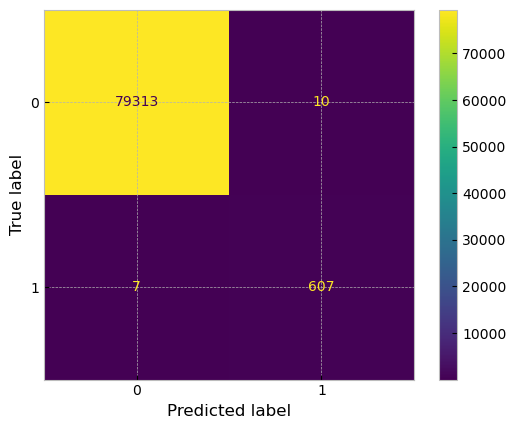

In [80]:
conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)
ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_).plot(values_format=".5g")

In [81]:
from sklearn.metrics import precision_recall_fscore_support

In [82]:
(
    (_, precision),
    (_, recall),
    (_, fscore),
    (_, _),
) = precision_recall_fscore_support(y_true=y_val, y_pred=y_pred, average=None)
print(precision, recall, fscore)

0.9837925445705025 0.988599348534202 0.9861900893582454


In [83]:
from sklearn.metrics import auc, precision_recall_curve

In [84]:
from sklearn.metrics import recall_score

In [85]:
tnr = recall_score(y_val, y_pred, pos_label=0)
fpr = 1 - tnr
fpr

0.00012606684063887208

In [86]:
y1, y2 = y_train, model.decision_function(X_train)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

In [87]:
pre_lr, rec_lr, thresh_lr = precision_recall_curve(y1, y2, pos_label=1)

In [88]:
area = auc(rec_lr, pre_lr)
area

0.9840379574160634

In [89]:
from sklearn.metrics import PrecisionRecallDisplay

In [90]:
import matplotlib.pyplot as plt
plt.style.use("bmh")

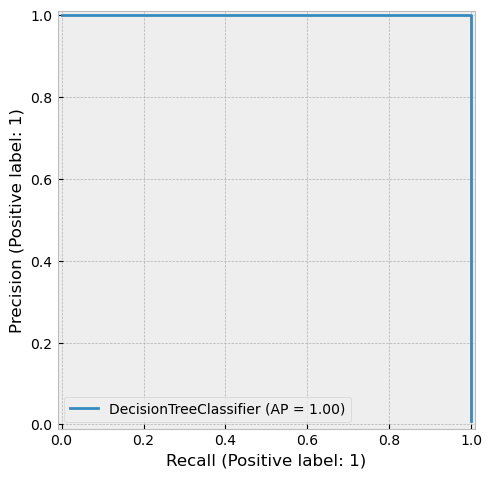

In [91]:
fig, ax = plt.subplots(figsize=(5, 5))

PrecisionRecallDisplay.from_estimator(model, X_train, y_train, pos_label=1, ax=ax)
# PrecisionRecallDisplay.from_estimator(model, X_val, y_val, pos_label=1, ax=ax)

fig.tight_layout()